# Imports

In [ ]:
from google.colab import drive
import os                
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn as sk
from sklearn import metrics
from sklearn import preprocessing
import math
import copy
import random
figure_index = 0
drive.mount('/content/drive')

filename = '../content/drive/My Drive/College/Data_Mining_Assignments/Topology Mapping/Dataset/' #Arsany
# filename = '../content/drive/My Drive/7th Term Assignments, Sheets & Labs/Topology Mapping/Dataset/' #Yomna

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1- Dataset

In [43]:
def list_files(dir):                                                                                                  
    t_10 = []
    t_50 = []
    t_100 = []
    nodes10 = []
    for i in range(1,11):
      nodes10.append(str(i))
    nodes50 = []
    for i in range(1,51):
      nodes50.append(str(i))
    nodes100 = []
    for i in range(1,101):
      nodes100.append(str(i))
        
    files = os.walk(dir).__next__()[2]   
    files.sort(reverse = False)                                                                          
    if (len(files) > 0):                                                                                          
        for file in files:
          G = nx.Graph()
          if (file[:5] == 't_10_'):
            G = nx.read_edgelist(os.path.join(dir, file), data =[('weight', int)])
            G.add_nodes_from(nodes10)
            # print(len(G.nodes))
            t_10.append(G)
          elif (file[:5] == 't_50_'):
            G = nx.read_edgelist(os.path.join(dir, file), data =[('weight', int)])
            G.add_nodes_from(nodes50)
            t_50.append(G)
          elif (file[:5] == 't_100'):
            G = nx.read_edgelist(os.path.join(dir, file), data =[('weight', int)])
            G.add_nodes_from(nodes100)
            t_100.append(G)
    return t_10, t_50, t_100

In [44]:
t_10, t_50, t_100 = list_files(filename)
gt_50 = np.genfromtxt(os.path.join(filename, "ground_truth.txt"), skip_header=10, skip_footer=0)
gt_10 = np.genfromtxt(os.path.join(filename, "ground_truth.txt"), skip_header=0, skip_footer=10)
# print(gt_10)
# print(gt_50)

# 2- Visualize the Topologies before running

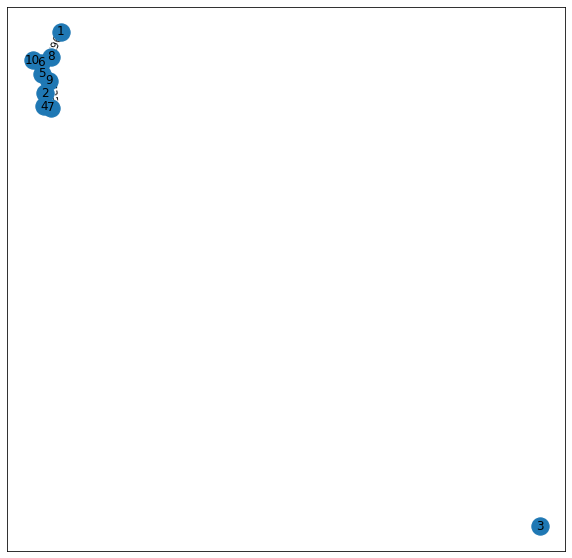

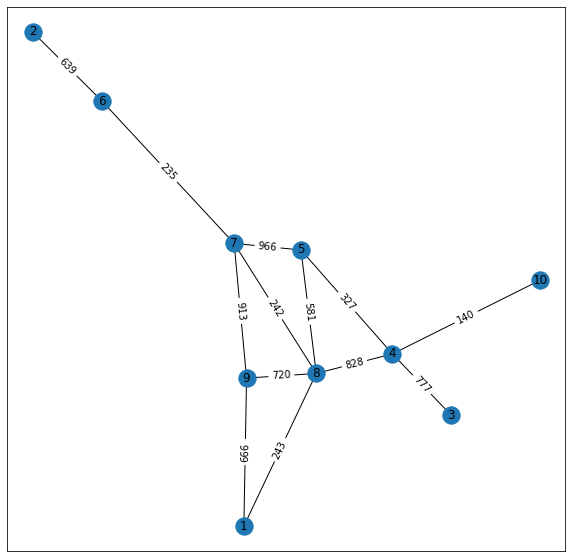

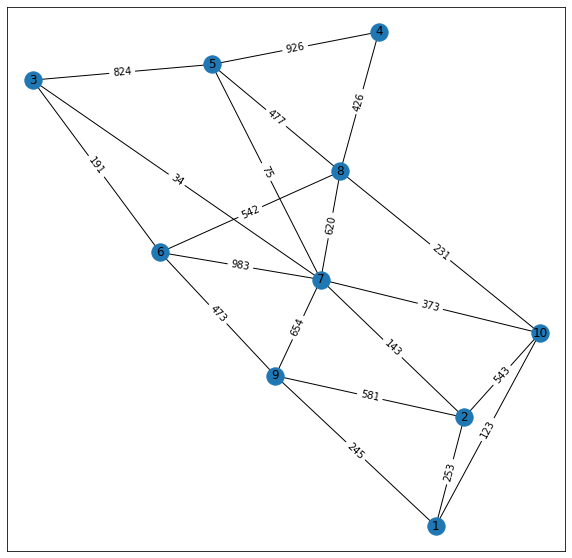

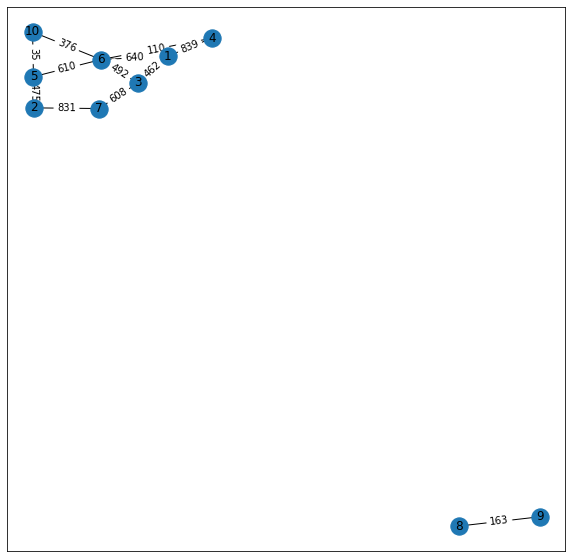

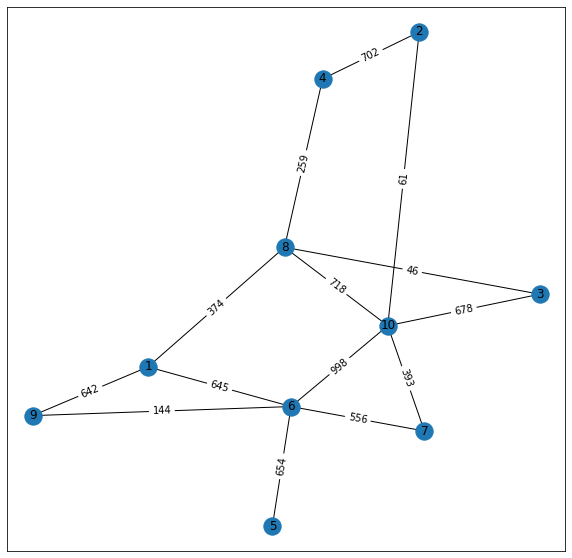

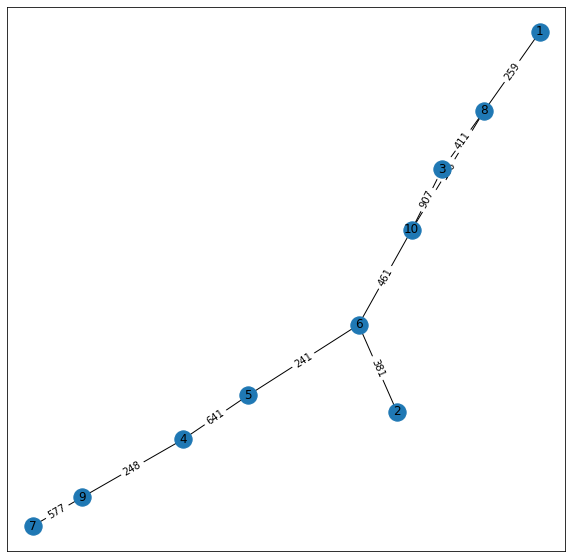

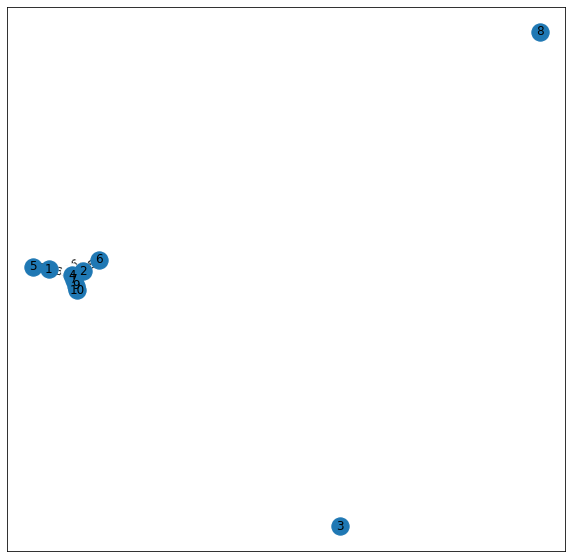

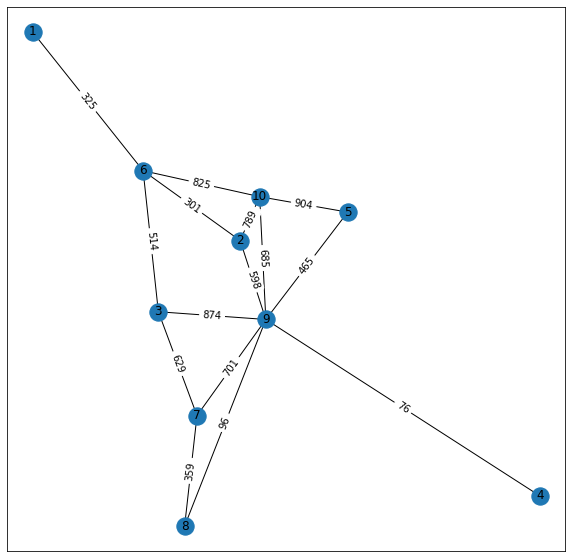

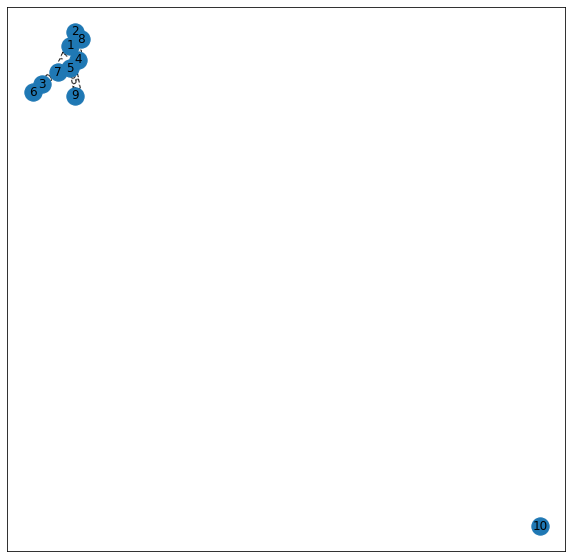

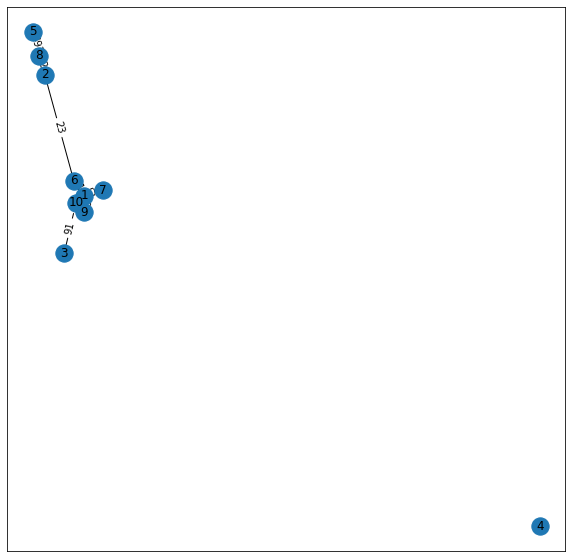

In [35]:
index = 1
for G in t_10:
  plt.figure(index, figsize=(10,10))
  pos = nx.spring_layout(G)
  nx.draw_networkx(G,pos)
  labels = nx.get_edge_attributes(G,'weight')
  nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
  index+=1

In [ ]:
index = 11
for G in t_50:
  plt.figure(index, figsize=(40,30))
  pos = nx.spring_layout(G)
  nx.draw_networkx(G,pos)
  labels = nx.get_edge_attributes(G,'weight')
  nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
  index+=1

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
index = 21
for G in t_100:
  plt.figure(index, figsize=(60,50))
  pos = nx.spring_layout(G)
  nx.draw_networkx(G,pos)
  labels = nx.get_edge_attributes(G,'weight')
  nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
  index+=1

Output hidden; open in https://colab.research.google.com to view.

# 3- Topology Mapping

## a. Similarity matrix and the degree matrix △


In [45]:
def filling_node_list(node, n):
  i = 1
  while i < n:
    node.append(str(i))
    i += 1
  return node

def similarity_matrix(t_n, n):
  t_n_matrices = []
  nodelist_n = []
  nodelist_n = filling_node_list(nodelist_n, n + 1)
  for G in t_n:
    A = nx.to_numpy_matrix(G, nodelist=nodelist_n)
    t_n_matrices.append(A)
  return t_n_matrices

In [46]:
t_10_matrices = similarity_matrix(t_10, 10)
t_50_matrices = similarity_matrix(t_50, 50)
t_100_matrices = similarity_matrix(t_100, 100)

In [47]:
def degree_matrix(similarity_matrix):
  degree_matrix = np.sum(similarity_matrix, axis = 1)
  degree_matrix = np.asarray(degree_matrix)
  degree_matrix = degree_matrix.flatten()
  degree_matrix = np.diag(degree_matrix)
  return degree_matrix

In [48]:
for i in t_10_matrices:
  print("similarity\n",i)
  degree = degree_matrix(i)
  print("degree\n", degree)

similarity
 [[  0.   0.   0.   0.   0.   0.   0. 296.   0.   0.]
 [  0.   0.   0. 988. 629. 201. 650.   0. 788.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 988.   0.   0.   0.   0. 522.   0. 269.   0.]
 [  0. 629.   0.   0.   0. 745.   0. 376. 446. 360.]
 [  0. 201.   0.   0. 745.   0.  15. 686. 344. 929.]
 [  0. 650.   0. 522.   0.  15.   0.   0. 125.   0.]
 [296.   0.   0.   0. 376. 686.   0.   0. 594.   0.]
 [  0. 788.   0. 269. 446. 344. 125. 594.   0.   0.]
 [  0.   0.   0.   0. 360. 929.   0.   0.   0.   0.]]
degree
 [[ 296.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0. 3256.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0. 1779.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0. 2556.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0. 2920.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0. 1312.    0.    0.    0.]
 [   0. 

In [49]:
for i in t_50_matrices:
  print("similarity\n",i)
  degree = degree_matrix(i)
  print("degree\n", degree)

similarity
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
degree
 [[1696.    0.    0. ...    0.    0.    0.]
 [   0.  246.    0. ...    0.    0.    0.]
 [   0.    0.   71. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... 1185.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.  801.]]
similarity
 [[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0. 870.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ... 870.   0.   0.]]
degree
 [[   0.    0.    0. ...    0.    0.    0.]
 [   0. 2152.    0. ...    0.    0.    0.]
 [   0.    0. 2158. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... 3179.    0.    0.]
 [   0.    0.    0. ...    0. 1665.    0.]
 [   0.    0.    0. ...    0.    0. 2940.]]
similarity
 [[  0.   0.   0. ...   0.   0.   0.]

In [50]:
for i in t_100_matrices:
  print("similarity\n",i)
  degree = degree_matrix(i)
  print("degree\n", degree)

similarity
 [[  0. 783.   0. ...   0.   0.   0.]
 [783.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0. 868.]
 [  0.   0.   0. ...   0. 868.   0.]]
degree
 [[8105.    0.    0. ...    0.    0.    0.]
 [   0. 7038.    0. ...    0.    0.    0.]
 [   0.    0. 9027. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... 5528.    0.    0.]
 [   0.    0.    0. ...    0. 7991.    0.]
 [   0.    0.    0. ...    0.    0. 8443.]]
similarity
 [[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0. 208.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0. 680.   0.]
 [  0. 208.   0. ... 680.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
degree
 [[4502.    0.    0. ...    0.    0.    0.]
 [   0. 2916.    0. ...    0.    0.    0.]
 [   0.    0. 3894. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... 4525.    0.    0.]
 [   0.    0.    0. ...    0. 4078.    0.]
 [   0.    0.    0. 

## b. Spectral clustering algorithm with K values {2,4,6,8,10} for topologies with size 10, and {2,10,12,15,17,20,25} for 50 and 100.

In [51]:
def KMEANS(Data, k):
  kmeans = KMeans(n_clusters = k)
  labels = kmeans.fit_predict(Data)

  clusters = []

  for i in range(k):
    clusters.append([])
  
  index = 0
  for l in labels:
    clusters[l].append(Data[index,:])
    index = index + 1

  return clusters, labels


def spectrul_clustering(kcluster, t_n, n):

  t_n_matrices = similarity_matrix(t_n, n)
  CLUSTERS = []
  LABELS = []

  for sim in t_n_matrices:
    degree = degree_matrix(sim)
    laplacian = degree - sim
    La = np.dot(np.linalg.pinv(degree), laplacian)
    
    #get eigen vectors 
    values, vectors = np.linalg.eig(La)
    idx = values.argsort()
    values = values[idx]
    vectors = vectors[:, idx]
    U = vectors[:,0: kcluster].real
    # print("U is\n", U)
    clusters, labels = KMEANS(U, kcluster)
    # print(labels)  

    CLUSTERS.append(clusters)
    LABELS.append(labels)

  return CLUSTERS, LABELS

In [52]:
for k in [2,4,6,8,10]:
  print("Clustering for k = ", k)
  c, l = spectrul_clustering(k, t_10, 10)
  for i in l:
    print(i)
  print("\n\n\n")

Clustering for k =  2
[0 0 1 0 0 0 0 0 0 0]
[0 1 0 0 0 1 0 0 0 0]
[0 0 1 1 1 0 0 1 0 0]
[0 0 0 0 0 0 0 1 1 0]
[1 0 1 0 1 1 1 1 1 1]
[1 1 1 0 0 1 0 1 0 1]
[0 0 1 0 0 0 0 0 0 0]
[0 0 1 1 0 0 1 1 1 0]
[1 1 1 1 1 1 1 1 1 0]
[0 0 0 1 0 0 0 0 0 0]




Clustering for k =  4
[3 1 2 1 0 0 1 0 0 0]
[3 1 0 0 2 1 2 2 3 0]
[3 3 2 0 2 1 1 0 1 3]
[1 2 1 1 3 3 2 0 0 3]
[1 2 3 2 0 0 0 3 1 3]
[0 3 0 2 2 3 1 0 1 0]
[0 1 2 1 0 1 1 3 1 1]
[0 1 1 3 1 0 2 2 1 1]
[0 0 2 0 1 2 1 0 1 3]
[0 1 3 2 1 0 0 1 0 0]




Clustering for k =  6
[1 0 2 0 5 3 0 4 4 3]
[0 1 5 4 3 1 3 4 0 2]
[3 4 0 5 5 1 1 1 2 4]
[3 1 2 3 5 2 1 0 0 4]
[4 3 2 3 0 1 1 5 4 1]
[4 5 1 2 2 3 0 1 0 3]
[1 0 3 0 1 5 0 2 4 4]
[3 4 0 2 5 0 0 1 0 0]
[5 5 4 1 2 4 2 1 0 3]
[0 1 2 4 5 0 3 1 0 0]




Clustering for k =  8
[1 2 3 2 7 0 5 0 6 4]
[2 1 6 4 5 1 7 4 0 3]
[0 2 3 5 3 1 7 6 2 4]
[6 5 7 3 0 4 5 1 1 2]
[7 4 2 4 5 1 6 0 3 1]
[1 3 2 7 0 5 4 6 4 2]
[2 1 5 4 2 0 4 3 7 6]
[2 5 4 1 7 6 0 3 4 6]
[7 0 1 4 4 1 6 3 2 5]
[5 3 2 0 6 1 4 3 5 7]




Clustering for k

In [53]:
for k in [2,10,12,15,17,20,25]:
  print("Clustering for k = ", k)
  c, l = spectrul_clustering(k, t_50, 50)
  for i in l:
    print(i)
  print("\n\n\n")

Clustering for k =  2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1
 1 1 1 1 0 0 0 0 0 0 1 0 1]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 

In [54]:
for k in [2,10,12,15,17,20,25]:
  print("Clustering for k = ", k)
  c, l = spectrul_clustering(k, t_100, 100)
  for i in l:
    print(i)
  print("\n\n\n")

Clustering for k =  2
[1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1
 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
[0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0
 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1
 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0

# 4- Evaluation

## a. external evaluation techniques: Conditional Entropy, and F-Measure for 10 & 50 Topology

**Conditional Entropy**

In [ ]:
def HTCI(gt,labels,k,g_set):
  HC = 0
  for i in range(0,k):
    H = 0
    for j in g_set:
      nij = 0
      ni = 0
      for p in range(0,len(labels)):
        l = labels[p]
        if l == i:
          ni+=1
          if (gt[p] == j):
            nij+=1
      if nij == 0:
        continue
      H -= (nij/ni)*np.log10(nij/ni)
    HC += H*ni/len(labels)
  return HC

In [ ]:
x = 0
HCallNet = []
for row in gt_50:
  g_set = set()
  for i in range(len(row)):
   g_set.add(row[i])
   k = len(g_set)
  c, labels = spectrul_clustering(k, t_50, 50)
  h = HTCI(row,labels[x],k,g_set)
  HCallNet.append(h)
  x = x + 1
for i in range(len(HCallNet)):
  print(HCallNet[i])

0.6045624849569834
0.4584022490107469
0.3192094981842263
0.37766654883195205
0.48308589870454843
0.5030143497098638
0.4456042777220586
0.3701702246354541
0.595690529930751
0.5187046525842542


In [ ]:
x = 0
HCallNet = []
for row in gt_10:
  g_set = set()
  for i in range(len(row)):
   g_set.add(row[i])
   k = len(g_set)
  c, labels = spectrul_clustering(k, t_10, 10)
  h = HTCI(row,labels[x],k,g_set)
  HCallNet.append(h)
  x = x + 1
for i in range(len(HCallNet)):
  print(HCallNet[i])

0.3464787519645937
0.290056610142443
0.16586075456620503
0.290056610142443
0.34647875196459377
0.3010299956639812
0.0
0.29228525323862886
0.2635483746814913
0.0


In [ ]:
# def purity_score(y_true, y_pred):
#     # compute contingency matrix (also called confusion matrix)
#     contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
#     # return purity
#     return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
    

**F-Measure**

In [ ]:
import sys
def f_measurment(y_true, y_pred, k):
  F = 0
  for i in range(0,k):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    purityi = contingency_matrix[i][i]/np.sum(contingency_matrix[i])
    reci = contingency_matrix[i][i]/np.sum(contingency_matrix,axis = 1)[i]
    if (purityi+reci) == 0:
      continue
    Fi = 2*purityi*reci/(purityi+reci)
    F += Fi
  F = F/k
  return F


In [ ]:
x = 0
FMallNet = []
for row in gt_10:
  max_k = int(np.max(row)) + 1
  c, labels = spectrul_clustering(max_k, t_10, 10)
  F = f_measurment(row, labels[x], max_k)
  FMallNet.append(F)
  x = x + 1
  
for i in range(len(FMallNet)):
  print(FMallNet[i])

0.35
0.5416666666666667
0.75
0.5416666666666667
0.3333333333333333
0.5
1.0
0.6
0.20833333333333331
1.0


In [ ]:
x = 0
FMallNet = []
for row in gt_50:
  g_set = set()
  for i in range(len(row)):
   g_set.add(row[i])
   k = len(g_set)
  c, labels = spectrul_clustering(k, t_50, 50)
  F = f_measurment(row, labels[x], k)
  FMallNet.append(F)
  x = x + 1
  
for i in range(len(FMallNet)):
  print(FMallNet[i])

0.022727272727272728
0.0980392156862745
0.013333333333333332
0.0
0.042857142857142864
0.059829059829059825
0.0
0.021739130434782608
0.044444444444444446
0.23555555555555555


## b. Normalized-Cut evaluation technique for 100 topology

In [58]:
def get_cluster_graphs(G,k,labels,n):
  nodes = []
  global figure_index
  color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(k)]
  for i in range (0,k):
    nodes.append([])
  for i in range (0,n):
    nodes[labels[i]].append(str(i+1))
  graphs = []
  c = 0
  figure_index+=1
  # fig, axes = plt.subplots(nrows=math.ceil(k/2), ncols=2)
  # ax = axes.flatten()
  for i in nodes:
    newG = G.subgraph(i)
    # plt.figure(figure_index, figsize=(10,10))
    # pos = nx.spring_layout(newG)
    # nx.draw_networkx(newG,pos,node_color= color[c]) #,ax = ax[c]
    # labels = nx.get_edge_attributes(newG,'weight')
    # nx.draw_networkx_edge_labels(newG,pos,edge_labels=labels)
    graphs.append(newG)
    c+=1
  return graphs
# get cut betwen to subgraphs G1 & G2 in V Graph

def internal_dist(G):
  distance = 0
  for u,v,w in G.edges(data = 'weight'):
    distance += math.exp(-0.01*w)
  return distance

def external_dist(G,rest_edges):
  distance = 0
  for u,v,w in rest_edges:
    if (u in G.nodes) or ( v in G.nodes):
      distance += math.exp(-0.01*w)
  return distance

def NCmeasurment(V,clusters):
  all_edges = V.edges(data = 'weight')
  rest_edges = all_edges
  for i in clusters:
    edgelist = i.edges(data = 'weight')
    rest_edges = [fruit for fruit in all_edges if fruit not in edgelist]
    all_edges = rest_edges
  NC = 0
  for i in clusters:
    e = external_dist(i,rest_edges)
    if (e == 0):
      e = 1
    NC+= 1/(1+(internal_dist(i)/e))
  return NC

In [59]:
all_clusters = []
all_NCforKs = []
for k in [2]:
  print("Clustering for k = ", k)
  c, labels = spectrul_clustering(k, t_10, 10)
  print()
  index = 0
  all_NCforK = []
  pla = copy.deepcopy(t_10)
  for i in pla:
    clusters = get_cluster_graphs(i,k,labels[index],10)
    nodelist = i.nodes()
    all_NCforK.append(NCmeasurment(i,clusters))
    index+=1
  all_clusters.append(clusters)
  all_NCforKs.append(all_NCforK)
  print("NC for this K\n",all_NCforK)

Clustering for k =  2

NC for this K
 [1.3986151322970395, 1.1521604205454474, 1.6447378297028847, 1.3138814430605281, 1.3999849347391669, 0.6843395873424644, 1.3352175011415548, 0.19739476541647516, 1.61039601806266, 1.42790605416435]


In [60]:
# Screen l di
all_clusters = []
all_NCforKs = []
for k in [10,12,15,17,20,25]:
  print("Clustering for k = ", k)
  c, labels = spectrul_clustering(k, t_100, 100)
  index = 0
  all_NCforK = []
  pla = copy.deepcopy(t_100)
  for i in pla:
    clusters = get_cluster_graphs(i,k,labels[index],100)
    all_NCforK.append(NCmeasurment(i,clusters))
    index+=1
  all_clusters.append(clusters)
  all_NCforKs.append(all_NCforK)
  print("NC for this K is \n", all_NCforK)
# print(all_NCforKs)


Clustering for k =  10
NC for this K is 
 [9.515068944557038, 9.40273818269563, 9.549122414220063, 9.543606283283125, 9.028417145328099, 9.373681330152312, 9.643964202520802, 9.11062482769965, 9.702684763285701, 9.473965039574226]
Clustering for k =  12
NC for this K is 
 [11.701213213327915, 11.711718171991965, 11.423606914418768, 11.50526650268192, 10.54073219801221, 11.536429563524733, 11.44930504896488, 11.252674854377553, 11.66889632442605, 11.535713353039943]
Clustering for k =  15
NC for this K is 
 [14.770517766956283, 14.603433590161117, 14.420879293393416, 14.61257810237891, 13.569357619781327, 14.648418982394757, 14.552329745798863, 13.88670118148295, 14.663521507053936, 14.6539090028771]
Clustering for k =  17
NC for this K is 
 [16.590502191924966, 16.73916603886495, 16.75387789118935, 16.655986567409453, 15.630141584970392, 16.766074669731776, 16.344695590746127, 16.189595651498188, 16.634285849065392, 16.478255945253014]
Clustering for k =  20
NC for this K is 
 [19.7713

In [ ]:
#another trial 
def get_distances(cluster1, cluster2):
  distances = 0
  for i in range(cluster1.shape[0]):
    current = cluster[i,:]
    for j in range(cluster2.shape[0]):
      distances += lg.norm(current - cluster2[j,:])
  return distances
def normalized_cut_measure(clusters):
  result = 0
  current = 0
  for cluster in clusters:
    win = get_distances(cluster, cluster)
    wout = 0
    for j in range(cluster.shape[0]):
      if j != current:
        wout += get_distance(cluster, np.array(cluster[j]))
    current += 1
    result += wout / (win + wout)
  return result

# 5- Big Picture

In [ ]:
def get_cluster_graphs(G,k,labels,n):
  nodes = []
  global figure_index
  color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(k)]
  for i in range (0,k):
    nodes.append([])
  for i in range (0,n):
    nodes[labels[i]].append(str(i+1))
  graphs = []
  c = 0
  figure_index+=1
  # fig, axes = plt.subplots(nrows=math.ceil(k/2), ncols=2)
  # ax = axes.flatten()
  for i in nodes:
    newG = G.subgraph(i)
    # plt.figure(figure_index, figsize=(10,10))
    # pos = nx.spring_layout(newG)
    # nx.draw_networkx(newG,pos,node_color= color[c]) #,ax = ax[c]
    # labels = nx.get_edge_attributes(newG,'weight')
    # nx.draw_networkx_edge_labels(newG,pos,edge_labels=labels)
    graphs.append(newG)
    c+=1
  return graphs

def internal_traf(G):
  distance = 0
  for u,v,w in G.edges(data = 'weight'):
    distance += w
  return distance

def traffic(V,clusters):
  all_edges = V.edges(data = 'weight')
  rest_edges = all_edges
  for i in clusters:
    edgelist = i.edges(data = 'weight')
    rest_edges = [fruit for fruit in all_edges if fruit not in edgelist]
    all_edges = rest_edges
  NC = 0
  emulated = 0
  for u,v,w in rest_edges:
      emulated += w
  internal_trafics = []
  for i in clusters:
    internal_trafics.append(internal_traf(i))
  return emulated, internal_trafics

### Traffic for topology 10

In [77]:
all_clusters_t10 = []
emulated_t10 = []
internal_t10 = []
for k in [2,4,6,8,10]:
  clustreK = []
  emuk = []
  intk = []
  print("Clustering for k = ", k)
  c, labels = spectrul_clustering(k, t_10, 10)
  index = 0
  emulated = []
  internal = []
  pla = copy.deepcopy(t_10)
  for i in pla:
    clusters = get_cluster_graphs(i,k,labels[index],10)
    e, inter = traffic(i,clusters)
    emulated.append(e)
    internal.append(inter)
    index+=1
    clustreK.append(clusters)
    # emuk.append(emulated)
    # intk.append(internal)
  all_clusters_t10.append(clustreK)
  emulated_t10.append(emulated)
  internal_t10.append(internal)
  print("emulated traffic for this K is \n", emulated)
  print("internal traffic for this K is \n", internal)
# print(all_NCforKs)


Clustering for k =  2
emulated traffic for this K is 
 [0, 235, 1693, 0, 320, 241, 0, 2262, 0, 0]
internal traffic for this K is 
 [[8963, 0], [6403, 639], [4371, 2653], [5478, 163], [5848, 702], [2545, 1466], [2803, 0], [3144, 2735], [7054, 0], [5545, 0]]
Clustering for k =  4
emulated traffic for this K is 
 [2323, 3126, 3859, 2179, 2874, 950, 138, 3387, 2153, 114]
internal traffic for this K is 
 [[0, 4480, 0, 2160], [1629, 917, 639, 966], [2110, 1829, 919, 0], [1439, 163, 1021, 839], [1210, 1442, 702, 642], [641, 1703, 577, 381], [2310, 0, 0, 355], [3441, 988, 0, 325], [1042, 0, 2989, 870], [0, 1315, 4116, 0]]
Clustering for k =  6
emulated traffic for this K is 
 [5280, 4178, 5103, 3316, 3579, 2162, 521, 4884, 4033, 812]
internal traffic for this K is 
 [[929, 0, 2160, 0, 0, 594], [0, 966, 639, 0, 666, 828], [2145, 0, 0, 926, 543, 0], [0, 163, 0, 492, 831, 839], [0, 642, 0, 702, 1947, 0], [411, 577, 641, 461, 0, 0], [0, 489, 1438, 355, 0, 0], [359, 0, 0, 2898, 0, 0], [854, 490, 87

### Traffic for topology 50

In [74]:
all_clusters_t50 = []
emulated_t50 = []
internal_t50 = []
for k in [10,12,15,17,20,25]:
  clustreK = []
  emuk = []
  intk = []
  print("Clustering for k = ", k)
  c, labels = spectrul_clustering(k, t_50, 50)
  index = 0
  emulated = []
  internal = []
  pla = copy.deepcopy(t_50)
  for i in pla:
    clusters = get_cluster_graphs(i,k,labels[index],50)
    e, inter = traffic(i,clusters)
    emulated.append(e)
    internal.append(inter)
    index+=1
    clustreK.append(clusters)
    # emuk.append(emulated)
    # intk.append(internal)
  all_clusters_t50.append(clustreK)
  emulated_t50.append(emulated)
  internal_t50.append(internal)
  print("emulated traffic for this K is \n", emulated)
  print("internal traffic for this K is \n", internal)
# print(all_NCforKs)


Clustering for k =  10
emulated traffic for this K is 
 [821, 19251, 74586, 82944, 6865, 13974, 22747, 53057, 18315, 18203]
internal traffic for this K is 
 [[2099, 14611, 0, 3399, 0, 0, 0, 246, 0, 1998], [1961, 5483, 7477, 5593, 0, 1296, 2160, 1687, 4316, 3229], [13454, 901, 5351, 4582, 3177, 3241, 2903, 3727, 5865, 2901], [2252, 7647, 3216, 6004, 1121, 7474, 515, 7285, 5922, 5813], [0, 2365, 2503, 2584, 3682, 337, 5735, 1275, 4256, 1005], [8650, 2935, 1044, 580, 2203, 0, 2376, 4338, 2773, 3073], [6667, 6732, 100, 1182, 2782, 0, 7764, 1513, 2861, 1702], [1566, 3111, 3043, 3010, 4221, 6214, 4486, 4643, 3784, 3589], [3898, 4575, 3129, 2140, 2311, 8502, 0, 0, 3217, 3118], [2502, 1695, 11601, 1086, 549, 3364, 2260, 1889, 972, 4098]]
Clustering for k =  12
emulated traffic for this K is 
 [3558, 20956, 79150, 87488, 8330, 14331, 24350, 55868, 20468, 19695]
internal traffic for this K is 
 [[1998, 2149, 2099, 5794, 2286, 246, 0, 0, 0, 0, 5044, 0], [1687, 3975, 6310, 6424, 558, 1961, 3229, 0

### Traffic for topology 100

In [75]:
all_clusters_t100 = []
emulated_t100 = []
internal_t100 = []
for k in [10,12,15,17,20,25]:
  clustreK = []
  emuk = []
  intk = []
  print("Clustering for k = ", k)
  c, labels = spectrul_clustering(k, t_100, 100)
  index = 0
  emulated = []
  internal = []
  pla = copy.deepcopy(t_100)
  for i in pla:
    clusters = get_cluster_graphs(i,k,labels[index],100)
    e, inter = traffic(i,clusters)
    emulated.append(e)
    internal.append(inter)
    index+=1
    clustreK.append(clusters)
    # emuk.append(emulated)
    # intk.append(internal)
  all_clusters_t100.append(clustreK)
  emulated_t100.append(emulated)
  internal_t100.append(internal)
  print("emulated traffic for this K is \n", emulated)
  print("internal traffic for this K is \n", internal)
# print(all_NCforKs)


Clustering for k =  10
emulated traffic for this K is 
 [252033, 78771, 290927, 251855, 10, 220225, 317537, 79115, 200997, 47525]
internal traffic for this K is 
 [[22320, 15187, 11486, 2436, 6148, 9275, 12507, 14870, 22536, 9518], [2800, 33458, 6044, 5641, 654, 14552, 11097, 6394, 2862, 7314], [16920, 8798, 14640, 23478, 12862, 7086, 3193, 20708, 8137, 10678], [7999, 8099, 12690, 1552, 28827, 6858, 21632, 15237, 8323, 13558], [83322, 0, 0, 0, 0, 0, 0, 0, 0, 339], [19227, 6246, 11914, 10935, 16454, 11839, 7423, 12130, 12764, 4673], [6849, 19058, 17379, 9962, 14994, 17515, 8410, 13564, 23810, 8649], [4284, 17570, 752, 15198, 2521, 4438, 3232, 12473, 15171, 12901], [6047, 10012, 8628, 12462, 28880, 16030, 9731, 4750, 8578, 10251], [20056, 1372, 10730, 1046, 2663, 7654, 6292, 2991, 33973, 740]]
Clustering for k =  12
emulated traffic for this K is 
 [261198, 81745, 293574, 254707, 2278, 225623, 320323, 84061, 205108, 54383]
internal traffic for this K is 
 [[1777, 7579, 13252, 23767, 2197

In [84]:
def visualize_t(G,clusters,index):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(clusters))]
    plt.figure(index, figsize=(20,10))
    pos = nx.spring_layout(G,k=1,iterations=20)
    nx.draw_networkx(G,pos)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    index+=1
    c = 0
    for newG in clusters:
      plt.figure(index , figsize=(20,10))
      pos = nx.spring_layout(newG,k=1,iterations=20)
      nx.draw_networkx(newG,pos,node_color= color[c]) #,ax = ax[c]
      labels = nx.get_edge_attributes(newG,'weight')
      nx.draw_networkx_edge_labels(newG,pos,edge_labels=labels)
      c+=1
    plt.show()
    return 0

# Visualization of topologys

In [80]:
def visualize_10(G_num,k_num):
  visualize_t(t_10[G_num],all_clusters_t10[k_num][G_num],0) # [which k][which graph]
  print("emulated traffic is ", emulated_t10[k_num][G_num])
  print("internal traffic is ",internal_t10[k_num][G_num])

In [81]:
def visualize_50(G_num,k_num):
  visualize_t(t_50[G_num],all_clusters_t50[k_num][G_num],0) # [which k][which graph]
  print("emulated traffic is ", emulated_t50[k_num][G_num])
  print("internal traffic is ",internal_t50[k_num][G_num])

In [82]:
def visualize_100(G_num,k_num):
  visualize_t(t_100[G_num],all_clusters_t100[k_num][G_num],0) # [which k][which graph]
  print("emulated traffic is ", emulated_t100[k_num][G_num])
  print("internal traffic is ",internal_t100[k_num][G_num])

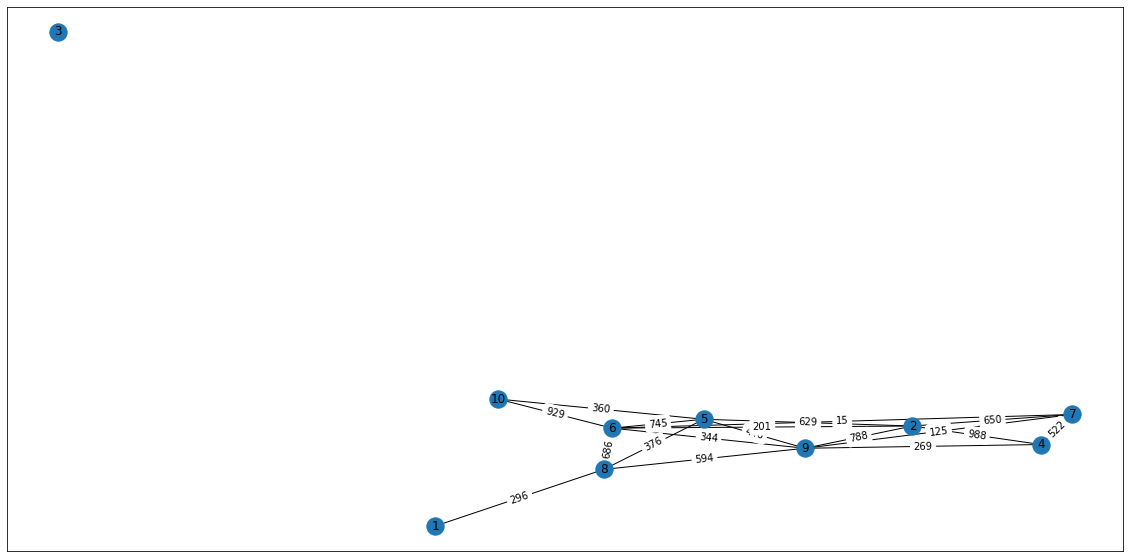

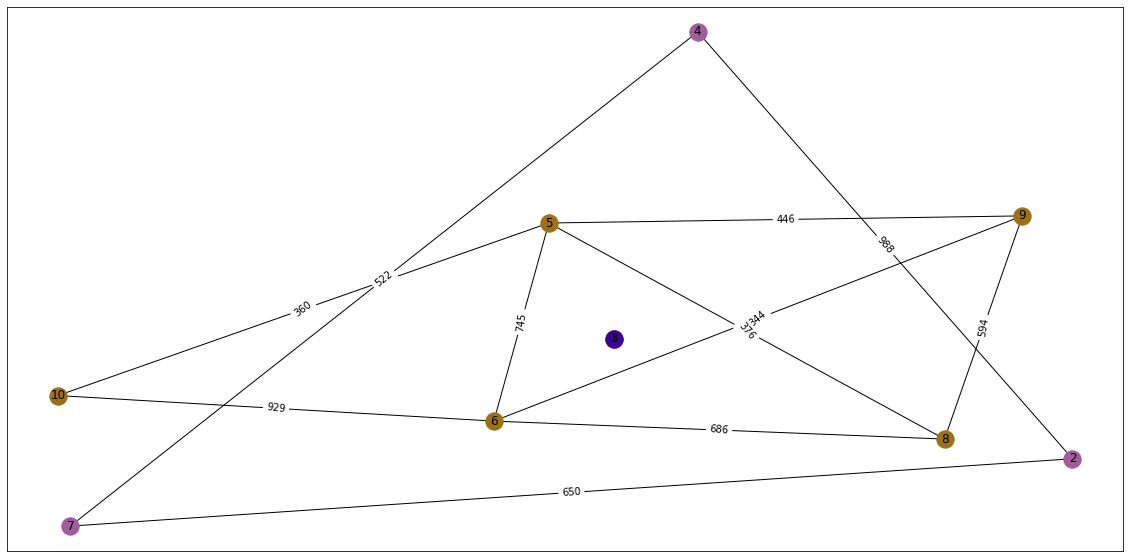

emulated traffic is  2323
internal traffic is  [0, 4480, 0, 2160]


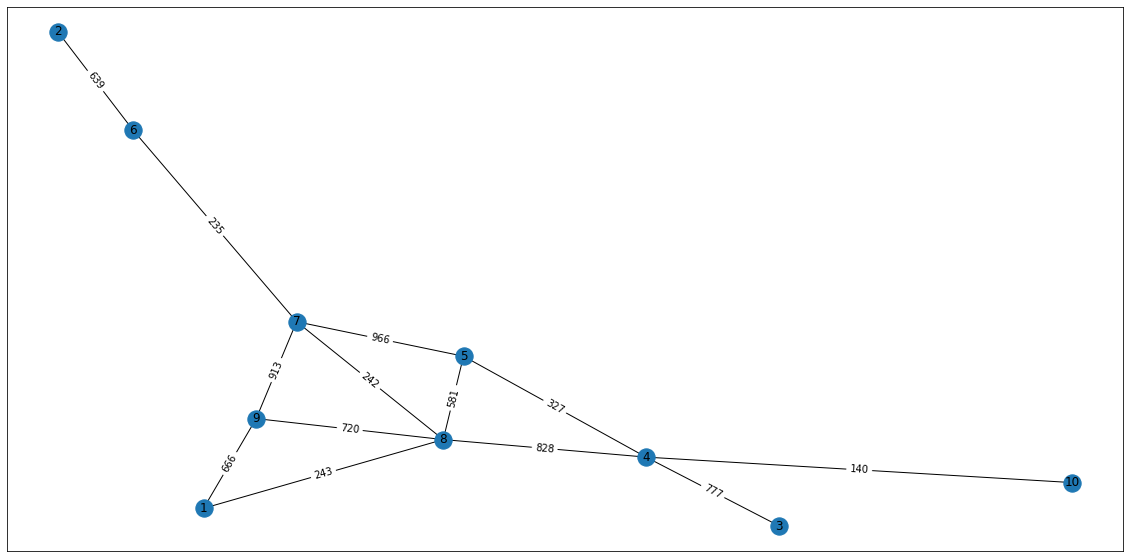

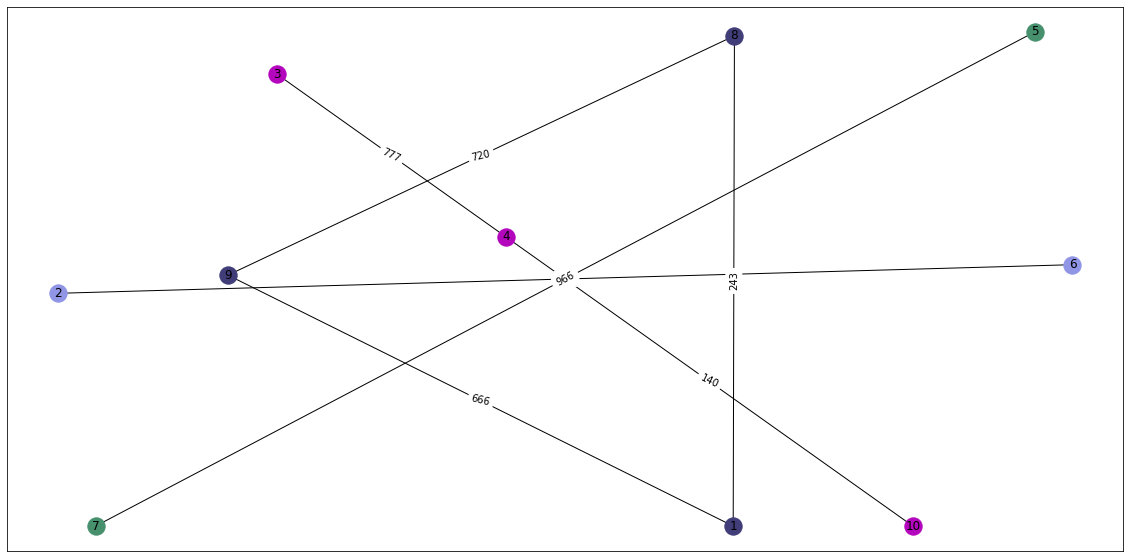

emulated traffic is  3126
internal traffic is  [1629, 917, 639, 966]


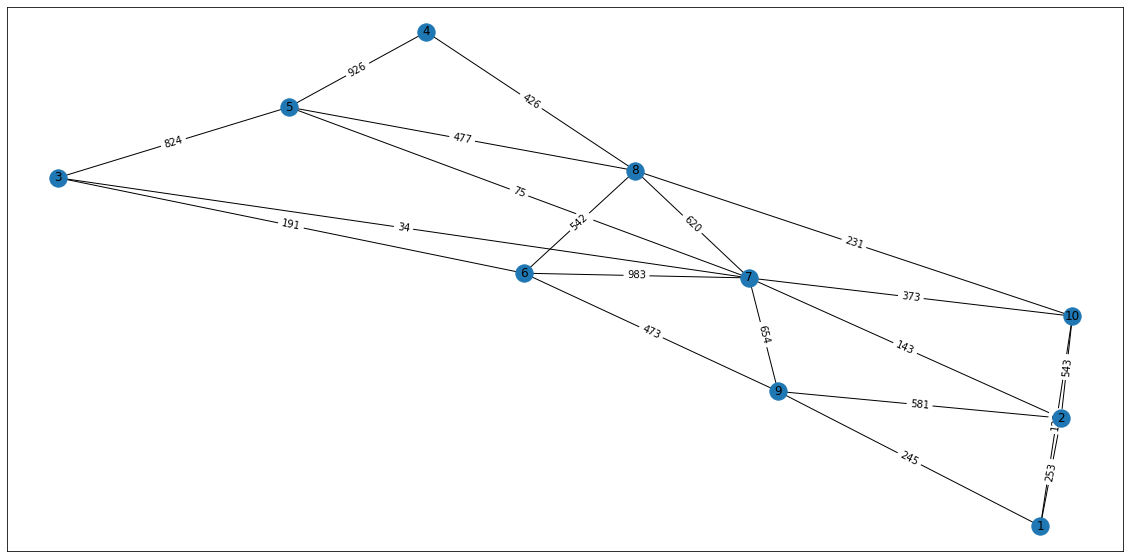

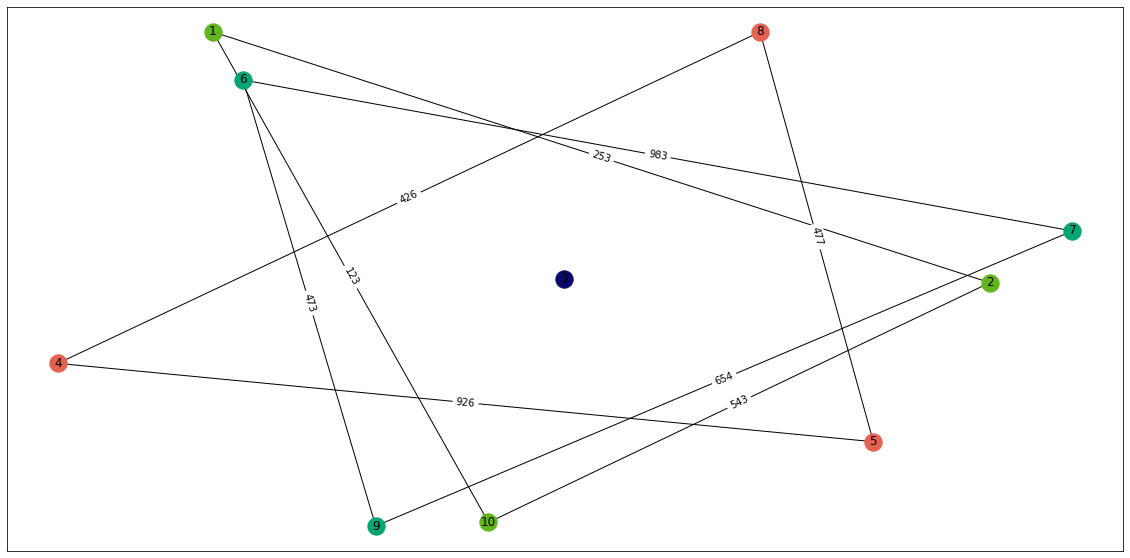

emulated traffic is  3859
internal traffic is  [2110, 1829, 919, 0]


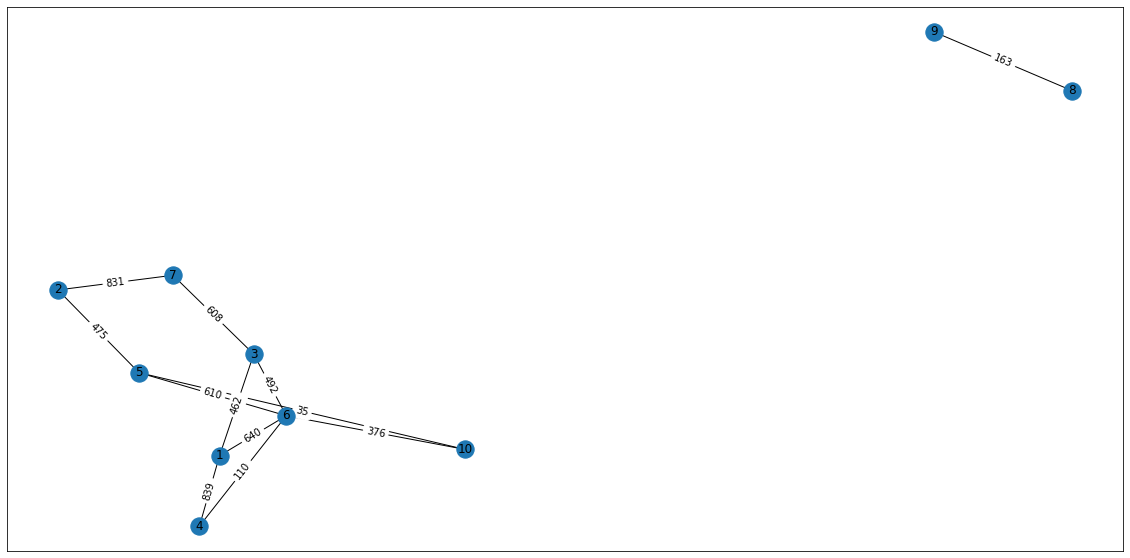

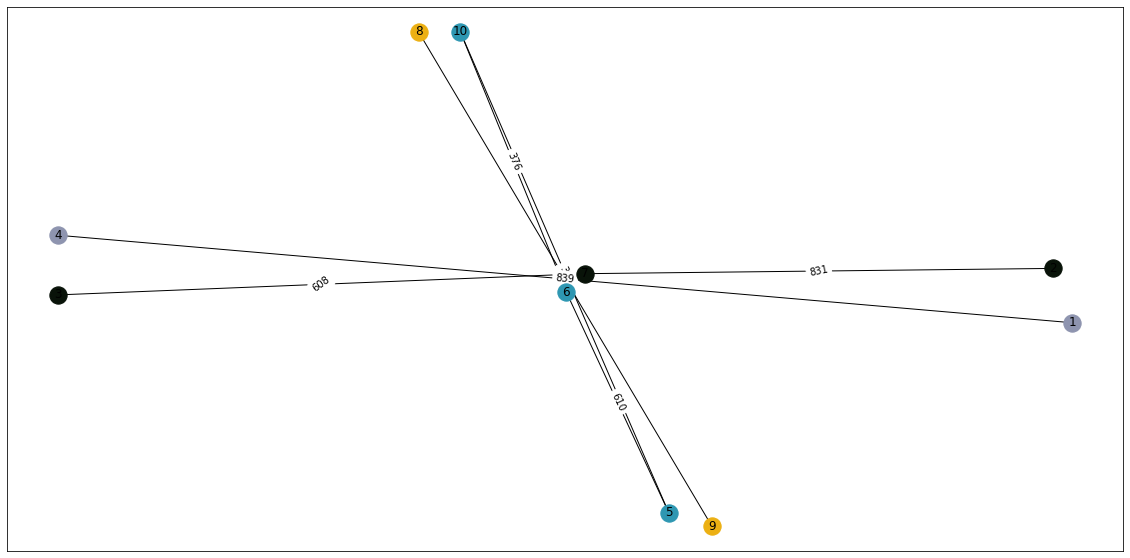

emulated traffic is  2179
internal traffic is  [1439, 163, 1021, 839]


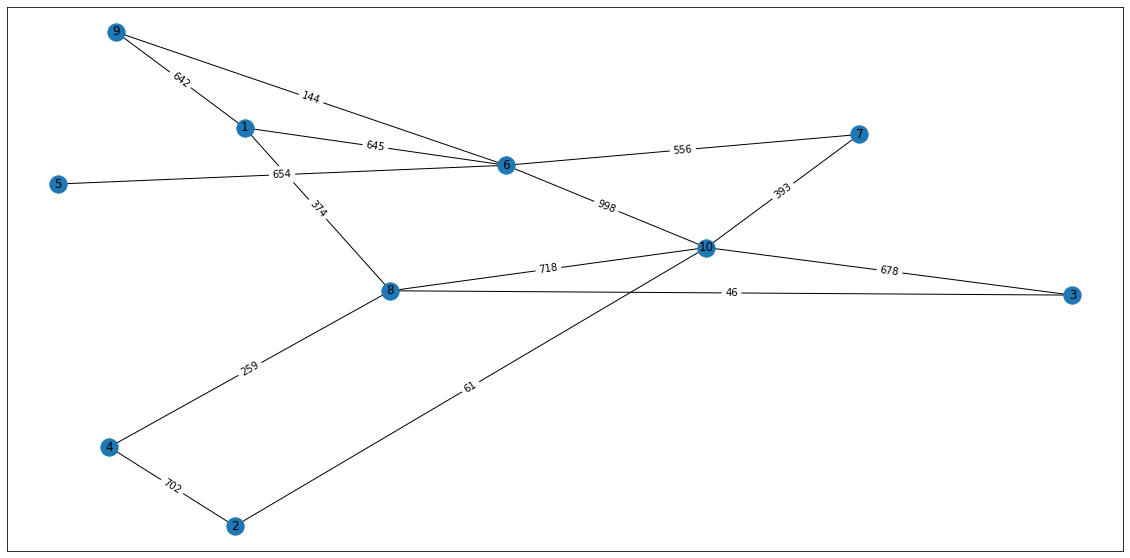

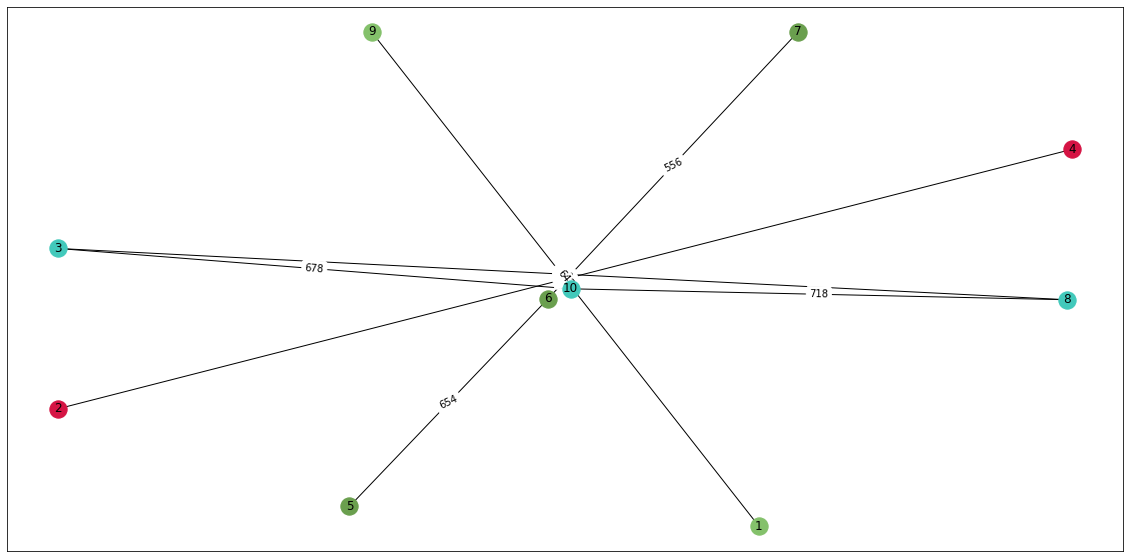

emulated traffic is  2874
internal traffic is  [1210, 1442, 702, 642]


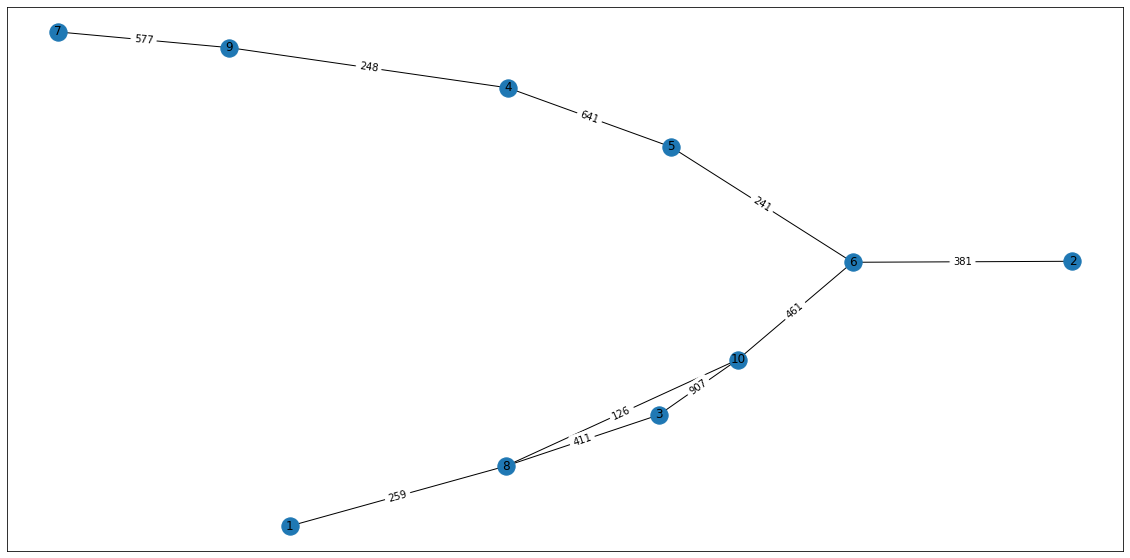

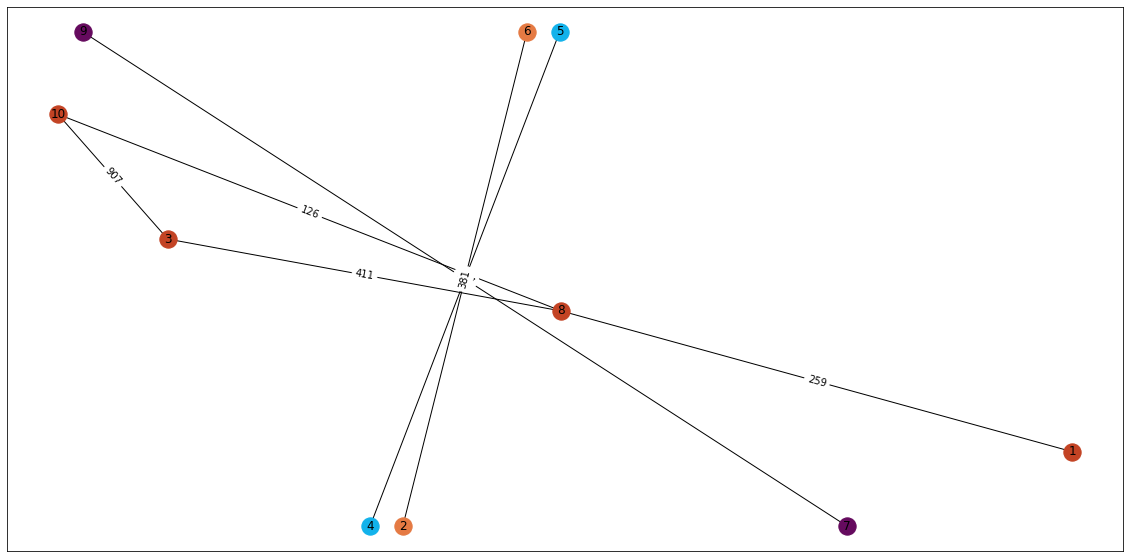

emulated traffic is  950
internal traffic is  [641, 1703, 577, 381]


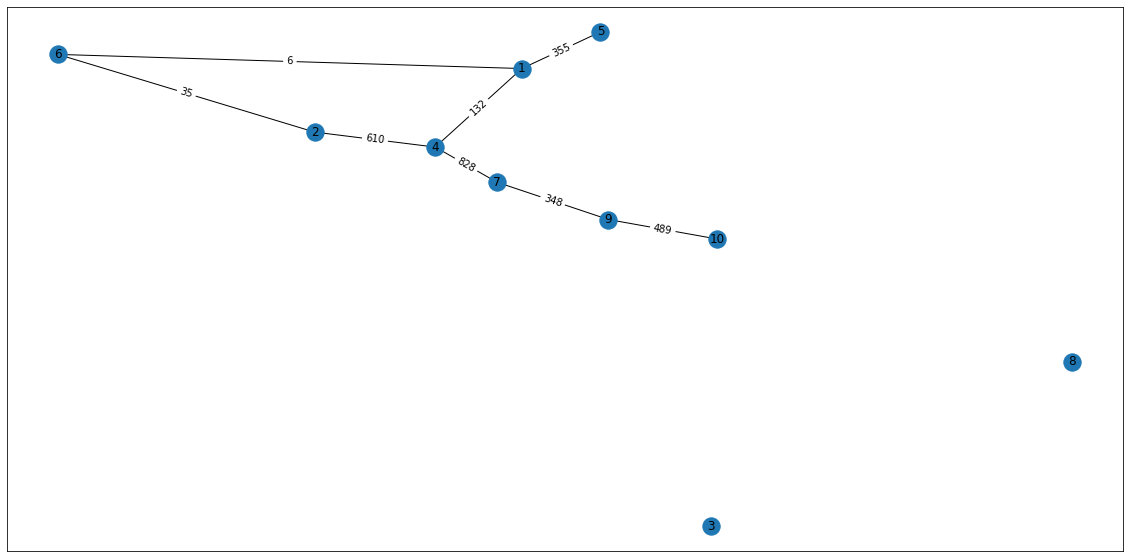

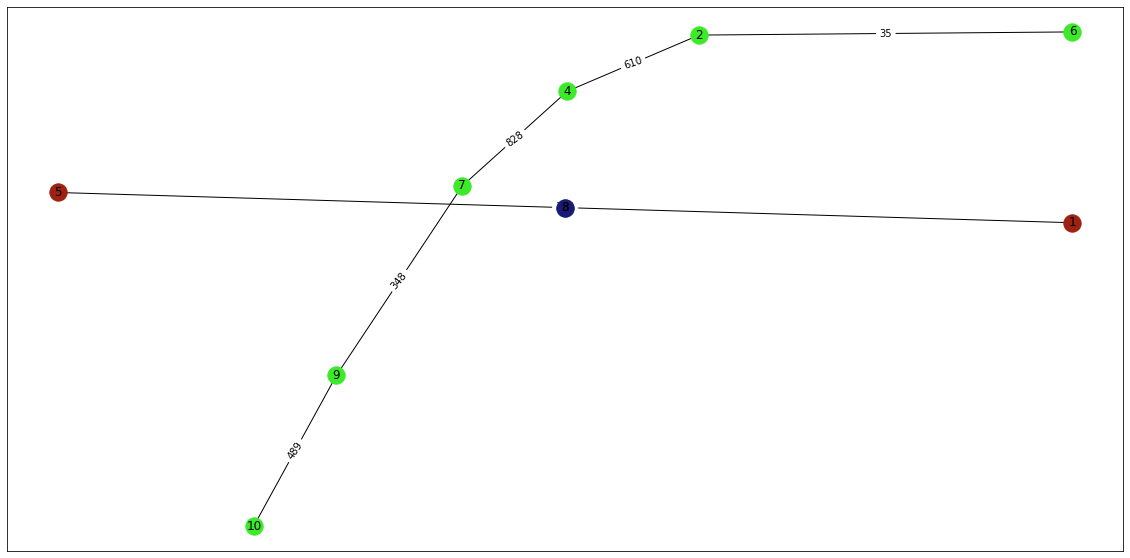

emulated traffic is  138
internal traffic is  [2310, 0, 0, 355]


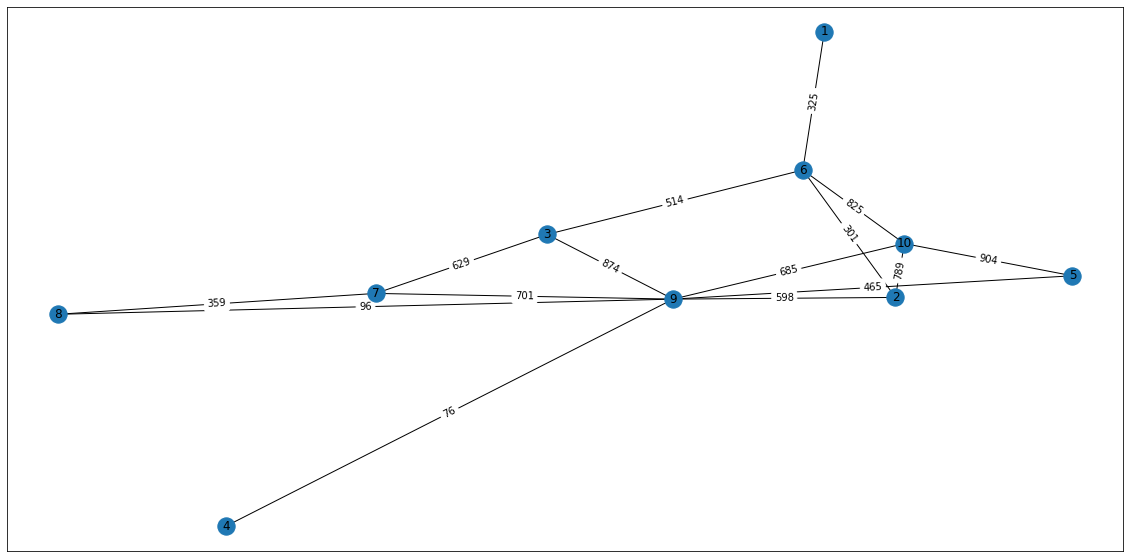

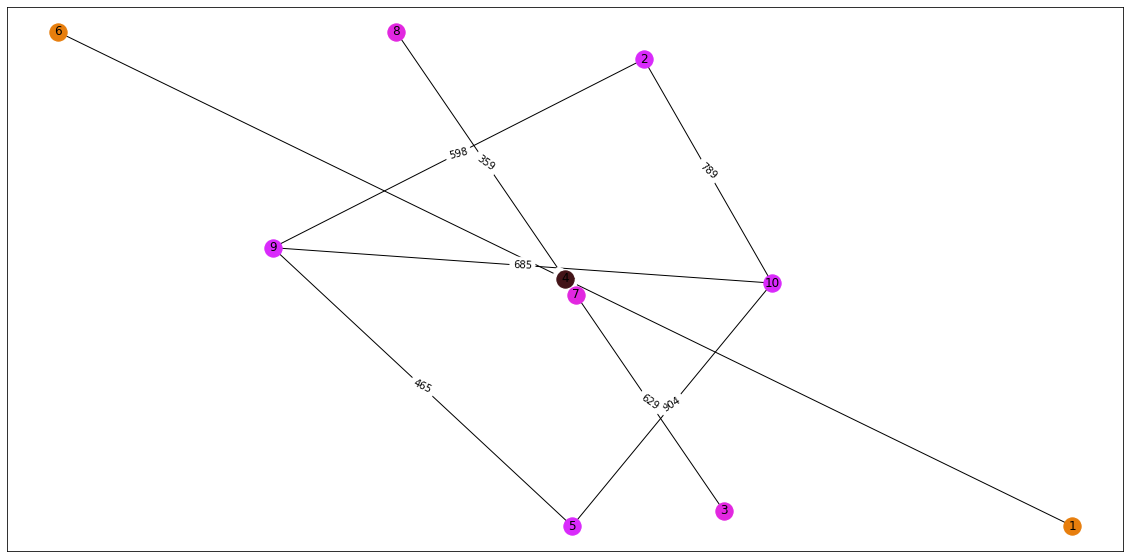

emulated traffic is  3387
internal traffic is  [3441, 988, 0, 325]


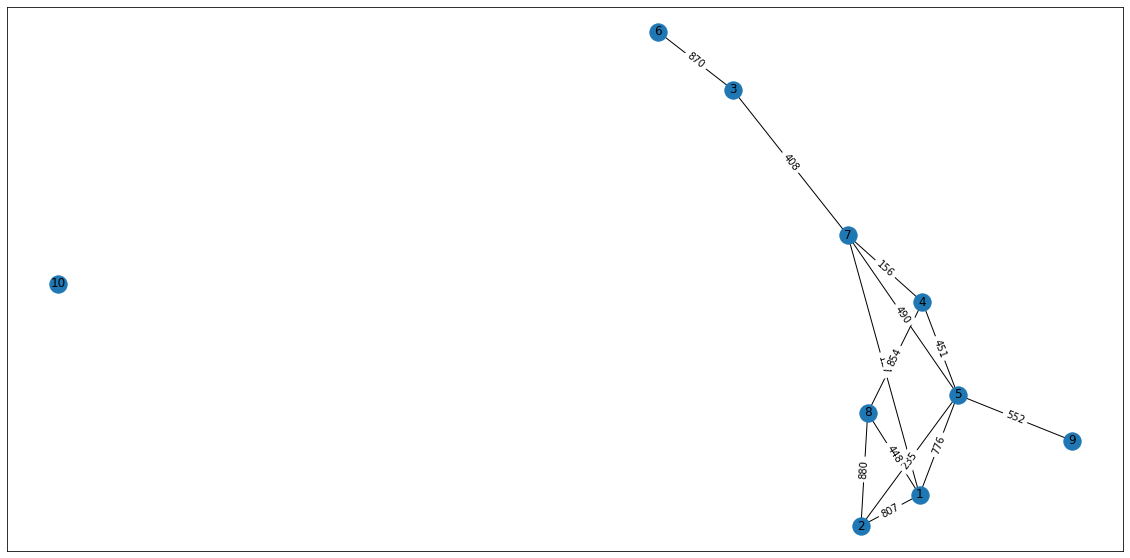

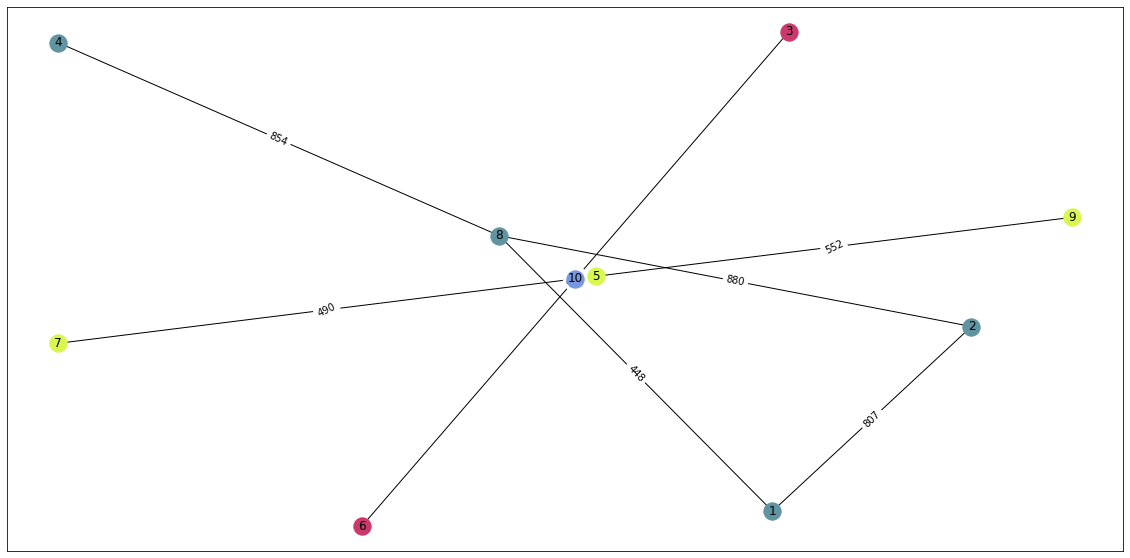

emulated traffic is  2153
internal traffic is  [1042, 0, 2989, 870]


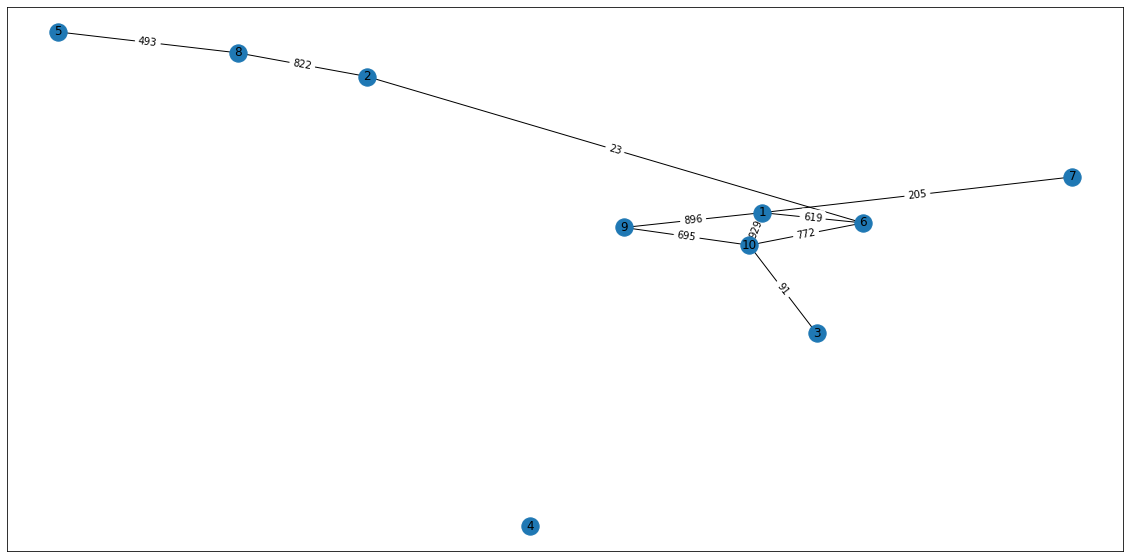

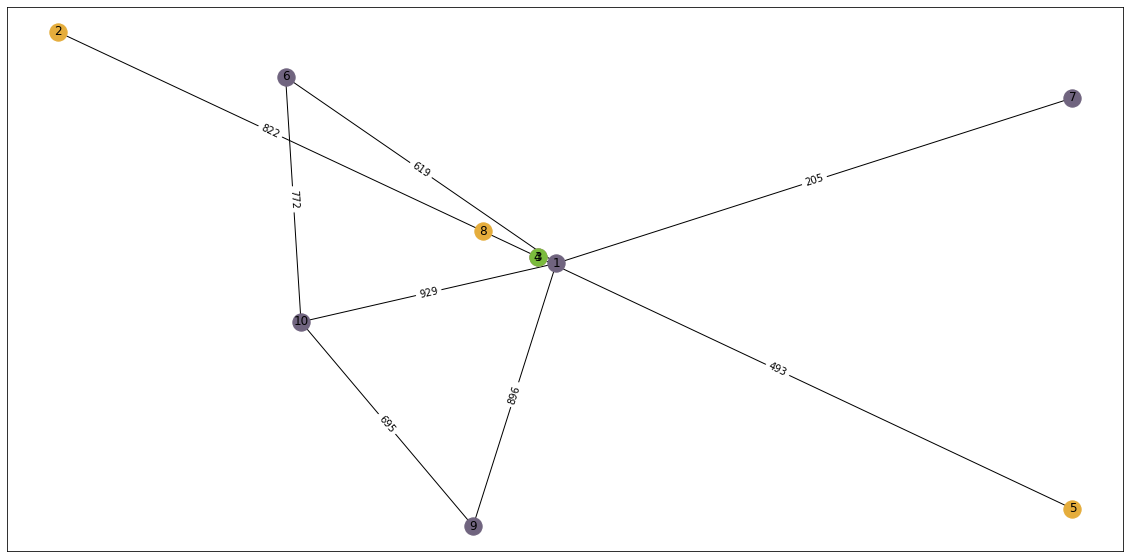

emulated traffic is  114
internal traffic is  [0, 1315, 4116, 0]


In [85]:
# visualize_t(t_10[0],all_clusters_t10[1][0],0) # [which k][which graph]
# print("emulated traffic is ", emulated_t10[1][0])
# print("internal traffic is ",internal_t10[1][0])
for i in range(0,10):
    visualize_10(i,1)

In [86]:
for i in range(0,10):
    visualize_50(i,1)

Output hidden; open in https://colab.research.google.com to view.

In [87]:
for i in range(0,10):
    visualize_100(i,1)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def visualize_new(G,k,n):
  pla = []
  pla.append(G)
  c, labels = spectrul_clustering(k, pla, n)
  clusters = get_cluster_graphs(G,k,labels,n)
  visualize_t(G,clusters,index)


In [ ]:
# from sklearn.metrics import f1_score
# def F_measure(gt_n, t_n, n):
#   for row in gt_n:
#     max_cluster = int(np.max(row))
#     # print(max_cluster)
#     clusters, labels = spectrul_clustering(max_cluster + 1, t_n, n)
#     # print("clusters\n", clusters)
#     # print("labels\n", labels)
#     r = []
#     for i in row:
#       r.append(int(i))
#     i = 0
#     while i < n:
#       l = []
#       for j in labels[i]:
#         l.append(j)
#       print("Labels:", l)
#       print("predection:", r)
#       F = f1_score(r, l, average='macro')
#       print("F measure:", F)
#       i+=1
#     print("\n\n\n")
#     # f1_score(y_true, y_pred, average='macro')

In [ ]:
# test for anything

# b = [4,9,16,25]
# print(b)
# c = np.diag(b)
# print(c)
# d = np.linalg.inv(c)**0.5
# print(d)
# e = d
# print(e)

In [ ]:
# F_measure(gt_10, t_10, 10)